## 3. Black Body distribution

In [186]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [187]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Changing variables from $\epsilon ' = \epsilon / KT$ the black body distribution function is expressed as:

$f(\epsilon ')d\epsilon '= C \dfrac{\epsilon '^2 d\epsilon '}{exp(\epsilon ')-1}$

The following function in \textbf{python} have as an input parameter the photon energy $\epsilon '$ and the normalization constant $C$, the function returns the black body distribution function.

In [188]:
def BBDF(eps, C):
    f = C * eps**2/(exp(eps)-1)
    return f

In [194]:
e_phot = linspace(0.1, 20, 1000)
BBdf = BBDF(e_phot, 1.0)
norm = float(max(BBdf))
BBdf_norm = BBDF(e_phot, 1/norm)
print 'The maximim value of of the energy distibution function is: ', norm

The maximim value of of the energy distibution function is:  0.647610217201


In the figure bellow both the distribution energy function (dash line) and the normalized (solid line) energy distribution are plotted.

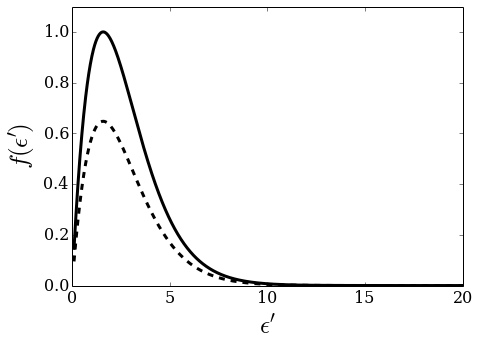

In [198]:
figure(figsize=(7, 5))
plot(e_phot, BBdf, lw=3, c='k', ls='--')
plot(e_phot, BBdf_norm, lw=3, c='k', ls='-')
ylim(0, 1.1)
xlabel(r"$\epsilon '$", fontsize=25)
ylabel(r"$f(\epsilon ')$", fontsize=25)
savefig('HW1EX3-fig1.png', bbox_inches='tight')

In [197]:
def rejection(N):
    edf = np.ones(N)*10
    for i in range(N):
        eps_i = np.random.random() * 5.0
        decisition = np.random.random()
        if decisition <= BBDF(eps_i, norm):
            edf[i] = eps_i
    index = np.where(edf!=10)[0]
    return edf[index]

In [192]:
photons = rejection(800000)
print len(photons)

222947


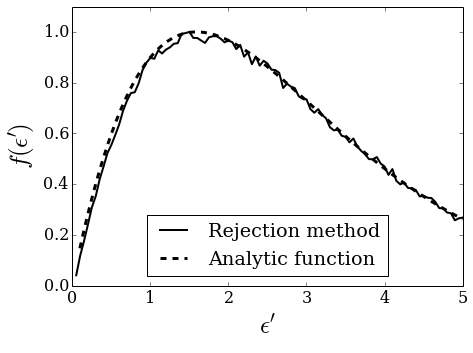

In [199]:
h = histogram(photons, bins=100)
figure(figsize=(7, 5))
plot(h[1][1:], h[0]/float(max(h[0])), lw=2, c='k', label='Rejection method')
plot(e_phot, BBdf_norm, lw=3, c='k', ls='--', label='Analytic function')
xlim(0, 5)
ylim(0, 1.1)
legend(loc='best')
xlabel(r"$\epsilon '$", fontsize=25)
ylabel(r"$f(\epsilon ')$", fontsize=25)
savefig('HW1EX3-fig2.png', bbox_inches='tight')